In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

Formatting helper function

In [31]:
def convert_dict_to_df(dictionary, features, remove_NaN=True, 
                        remove_all_zeroes=True, remove_any_zeroes=False, 
                        sort_keys=False):
    """
    Convert dictionary to a pandas data frame of features.
    
    Args:
        dictionary: Dictionary containing the feature names as keys and the 
            corresponding values.
        features: List of feature names. First feature passed needs to be 'poi'.
        remove_NaN: True converts all "NaN" strings to 0.
        remove_all_zeroes: True omits all 0 data points.
        remove_any_zeroes: True omits single 0 data points.
        sort_keys: True sorts the dictionary keys in alphabetical order before
            adding the data points to the data frame.

    Returns:
        Function returns a pandas data frame with each row representing a data 
        point with the specified features in its columns.
    """

    # check that first feature passed is 'poi'
    assert (features[0] == 'poi'), "The first feature needs to be 'poi'!"

    # data frame to store the data points as individual rows
    df = pd.DataFrame(columns=['name'] + features)

    # sort keys alphabetically if sort_keys is set to True
    if sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    # loop trough the data dictionary 
    for key in keys:
        
        val_dict = {'name': key} # first entry of data point is the name of the person

        for feature in features:
            # check if specified feature exists, throw a warning if not and 
            # stop the function
            try:
                val = dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return

            val = dictionary[key][feature]

            # set 'NaN' strings to np.NaN values
            if val == "NaN" and not remove_NaN:
                val = np.NaN
            # set NaN values to 0 if remove_NaN is set to True
            elif val == "NaN" and remove_NaN:
                val = 0

            val_dict[feature] = val

        # do not add all zero data points if remove_all_zeroes is set to True
        if remove_all_zeroes:
            append = False
            for _, val in val_dict.items(): 
                if val != 0 and val != "NaN":
                    append = True
                    break
        
        # don not add single zero data points if remove_any_zeroes is set to 
        # True
        elif remove_any_zeroes:
            append = True
            if 0 in val_list[1:] or "NaN" in val_list[1:]: # exclude 'poi' from criteria????
                append = False
        
        # all data points are added 
        else:
            append = True

        # append data point if it is flagged for addition
        if append:
            df = df.append(val_dict, ignore_index=True)
        
        # convert the 'poi' column from boolean to numerical
        df['poi'] = df['poi'].astype(int)
    
    return df

Import Data

In [32]:
# load dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# feature list
features = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 
            'director_fees', 'exercised_stock_options', 'expenses', 
            'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 
            'restricted_stock_deferred', 'salary', 'total_payments', 
            'total_stock_value', 'email_address', 'from_messages', 
            'from_poi_to_this_person', 'from_this_person_to_poi', 
            'shared_receipt_with_poi', 'to_messages']

# convert specified features to data frame
data_df = convert_dict_to_df(data_dict, features, remove_NaN=True, 
                        remove_all_zeroes=True, remove_any_zeroes=False, 
                        sort_keys=True)

print("Number of all zero data points: {}".format(len(list(data_dict.keys())) - len(data_df)))

Number of all zero data points: 0


In [33]:
data_df.head()

,name,poi,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,...,restricted_stock_deferred,salary,total_payments,total_stock_value,email_address,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
0,ALLEN PHILLIP K,0,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,0.0,304805.0,...,-126027.0,201955.0,4484442.0,1729541.0,phillip.allen@enron.com,2195.0,47.0,65.0,1407.0,2902.0
1,BADUM JAMES P,0,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,...,0.0,0.0,182466.0,257817.0,0,0.0,0.0,0.0,0.0,0.0
2,BANNANTINE JAMES M,0,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,0.0,0.0,...,-560222.0,477.0,916197.0,5243487.0,james.bannantine@enron.com,29.0,39.0,0.0,465.0,566.0
3,BAXTER JOHN C,0,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,1586055.0,...,0.0,267102.0,5634343.0,10623258.0,0,0.0,0.0,0.0,0.0,0.0
4,BAY FRANKLIN R,0,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,...,-82782.0,239671.0,827696.0,63014.0,frank.bay@enron.com,0.0,0.0,0.0,0.0,0.0


Data exploration

In [34]:
# summary of object type features
data_df.describe(include=[np.object])

,name,email_address
count,146,146
unique,146,112
top,GRAMM WENDY L,0
freq,1,35


In [35]:
# summary of numeric features
data_df.describe()

,poi,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
count,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.123288,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,4.350622e+06,5.846018e+06,358.602740,38.226027,24.287671,692.986301,1221.589041
std,0.329899,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,2.693448e+07,3.624681e+07,1441.259868,73.901124,79.278206,1072.969492,2226.770637
min,0.000000,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,9.394475e+04,2.288695e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,9.413595e+05,9.659550e+05,16.500000,2.500000,0.000000,102.500000,289.000000
75%,0.000000,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,1.968287e+06,2.319991e+06,51.250000,40.750000,13.750000,893.500000,1585.750000
max,1.000000,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,3.098866e+08,4.345095e+08,14368.000000,528.000000,609.000000,5521.000000,15149.000000


In [36]:
# count number of 0 values in each column
print((data_df == 0).sum(0))

name                           0
poi                          128
bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
loan_advances                142
long_term_incentive           80
other                         53
restricted_stock              36
restricted_stock_deferred    128
salary                        51
total_payments                21
total_stock_value             20
email_address                 35
from_messages                 60
from_poi_to_this_person       72
from_this_person_to_poi       80
shared_receipt_with_poi       60
to_messages                   60
dtype: int64


In [37]:
# drop 'TOTAL' row
data_df = data_df[data_df['name'] != 'TOTAL']

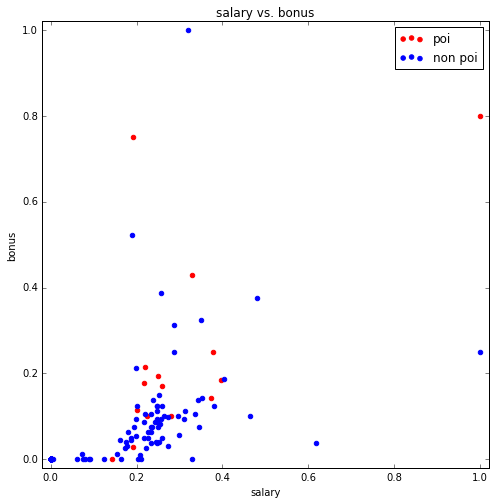

In [38]:
def scatter_plot(df, x, y, normalize=True):
    """
    
    """
    poi_df = df[df['poi'] == True]
    x_poi = poi_df[x].values.reshape(-1, 1)
    y_poi = poi_df[y].values.reshape(-1, 1)
    
    non_poi_df = df[df['poi'] == False]
    x_non_poi = non_poi_df[x].values.reshape(-1, 1)
    y_non_poi = non_poi_df[y].values.reshape(-1, 1)
    
    if normalize:
        x_poi = MinMaxScaler().fit_transform(x_poi)
        y_poi = MinMaxScaler().fit_transform(y_poi)
        
        x_non_poi = MinMaxScaler().fit_transform(x_non_poi)
        y_non_poi = MinMaxScaler().fit_transform(y_non_poi)
    
    # create plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(x_poi, y_poi, color="red", label="poi")
    ax.scatter(x_non_poi, y_non_poi, color="blue", label="non poi")
    ax.set(title="{} vs. {}".format(x, y), xlabel=x, xlim=[-0.02, 1.02], ylabel=y, ylim=[-0.02, 1.02])
    plt.legend()
    
    plt.show()

scatter_plot(data_df, 'salary', 'bonus')

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
loan_advances                142
long_term_incentive           80
other                         53
restricted_stock              36
restricted_stock_deferred    128
salary                        51
total_payments                21
total_stock_value             20
email_address                 34
from_messages                 59
from_poi_to_this_person       71
from_this_person_to_poi       79
shared_receipt_with_poi       59
to_messages                   59

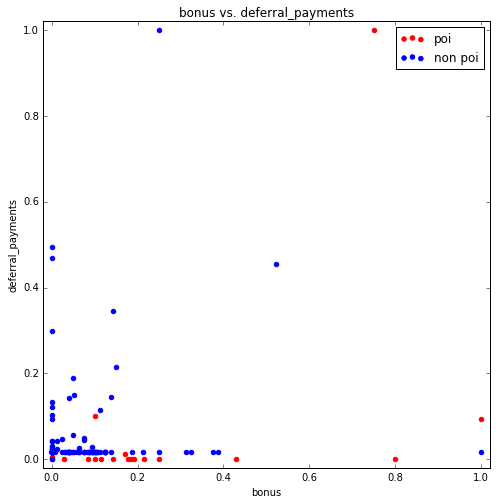

In [39]:
scatter_plot(data_df, 'bonus', 'deferral_payments')